# Final Simulation of Singular Routes

In [ ]:
import main_1 as m
import models.road_network.create_graph as cg

import json
from pprint import pprint
import matplotlib.pyplot as plt
import simulation.simulate_routes as sr
import datetime
import os
import numpy as np


In [ ]:
road_network_file, road_df, static_data, vehicle_data, battery_data, map_data, weights = m.import_data()

In [ ]:
OCV = battery_data["OCV"]
capacity = battery_data["Capacity"]
R_int = battery_data["R_internal"]
motor_eff = vehicle_data["motor_eff"]
graph = cg.create_osmnx_compatible_graph(road_network_file, debug = False)

In [ ]:
# m.create_new_test_set(road_df)

In [ ]:
with open("test_data/test_route_set.json", "r") as file:
        test_routes_dict = json.load(file)

## Simulate a Set of Routes

In [70]:
def simulate(results_log_file,results_filename, test_set_data ):
    simulation_results = {}

    start_time = datetime.datetime.now()
    start_time_str = start_time.strftime("%B %d, %Y at %I:%M:%S %p")

    with open(results_log_file, 'w') as log_file:
        log_file.write(f"{'='*50}\n")
        log_file.write(f"SIMULATION STARTED: {start_time_str}\n")
        log_file.write(f"Output file: {os.path.abspath(results_filename)}\n")
        log_file.write(f"Test set: test_set1\n")
        log_file.write(f"Routes to process: {len(test_set_data)}\n")
        log_file.write(f"{'='*50}\n\n")

# Use enumerate instead of manual counter
    for i, points in enumerate(test_set_data, 1):
        print(f"Processing route {i}/{len(test_set_data)}: {points[0]} to {points[1]}")
        
        # Initialize dictionary entry for this simulation
        simulation_results[f'sim{i}'] = {
            'start_point': points[0],
            'end_point': points[1],
            'optimised': {},
            'distance': {}
        }
        
        try:
            # Calculate optimised route
            route_output_optimised = sr.find_route(
                map_data, road_df, graph, points[0], points[1], 
                weights, plot=False, weights_type='objective'
            )
            
            # Store optimised route data
            opt_results = sr.return_route_data_complex(
                route_output_optimised, vehicle_data, static_data, 
                motor_eff, battery_data
            )
            
            simulation_results[f'sim{i}']['optimised'] = {
                'total_distance': opt_results[0],
                'total_consumption': opt_results[1],
                'total_climb': opt_results[2],
                'detailed_results': opt_results[3],
                'current_list': opt_results[4],
                'climbs': opt_results[5],
                'distances': opt_results[6],
                'consumptions': opt_results[7]
            }
            
            # Calculate distance-based route
            route_output_distance = sr.find_route(
                map_data, road_df, graph, points[0], points[1], 
                weights, plot=False, weights_type='distance'
            )
            
            # Store distance route data
            dist_results = sr.return_route_data_complex(
                route_output_distance, vehicle_data, static_data, 
                motor_eff, battery_data
            )
            
            simulation_results[f'sim{i}']['distance'] = {
                'total_distance': dist_results[0],
                'total_consumption': dist_results[1],
                'total_climb': dist_results[2],
                'detailed_results': dist_results[3],
                'current_list': dist_results[4],
                'climbs': dist_results[5],
                'distances': dist_results[6],
                'consumptions': dist_results[7]
            }
            
            print(f"Route {i}/{len(test_set_data)} complete")
            
        except Exception as e:
            print(f"Error on route {points}: {str(e)}")
            simulation_results[f'sim{i}']['error'] = str(e)

    class CustomEncoder(json.JSONEncoder):
        def default(self, obj):
            # Handle various non-serializable types
            if isinstance(obj, (np.bool_, bool)) or str(type(obj)) == "<class 'bool'>":
                return bool(obj)
            elif isinstance(obj, np.ndarray):
                return obj.tolist()
            elif isinstance(obj, np.integer):
                return int(obj)
            elif isinstance(obj, np.floating):
                return float(obj)
            elif hasattr(obj, 'tolist'):
                return obj.tolist()
            elif hasattr(obj, '__dict__'):
                return obj.__dict__
            return super().default(obj)

    # Use this encoder
    with open(results_filename, "w") as file:
        json.dump(simulation_results, file, indent=4, cls=CustomEncoder)

    end_time = datetime.datetime.now()
    end_time_str = end_time.strftime("%B %d, %Y at %I:%M:%S %p")
    total_duration = end_time - start_time

    with open(results_log_file, 'a') as log_file:
        log_file.write(f"\n{'='*50}\n")
        log_file.write(f"SIMULATION COMPLETED: {end_time_str}\n")
        log_file.write(f"Total duration: {total_duration}\n")
        log_file.write(f"Routes processed: {len(test_set_data)}\n")
        log_file.write(f"Results saved to: {os.path.abspath(results_filename)}\n")
        log_file.write(f"{'='*50}\n\n")


In [74]:
test_set_data = test_routes_dict['test_set5']
results_filename = "results/singular_routes_sim/simulation_test_set5.json"
results_log_file = "./results/singular_routes_sim/simulation_log5.txt"

simulate(results_log_file, results_filename, test_set_data)

Processing route 1/500: 1913249541 to 247910787
Route 1/500 complete
Processing route 2/500: 5489858552 to 280005573
Route 2/500 complete
Processing route 3/500: 1775501534 to 975696595
Error on route [1775501534, 975696595]: No path to 975696595.
Processing route 4/500: 430180324 to 280009062
Error on route [430180324, 280009062]: No path to 280009062.
Processing route 5/500: 3683449012 to 17705281
Route 5/500 complete
Processing route 6/500: 26165102 to 26215519
Route 6/500 complete
Processing route 7/500: 2941119306 to 1692451158
Route 7/500 complete
Processing route 8/500: 26165141 to 25954711
Route 8/500 complete
Processing route 9/500: 2941119306 to 843463019
Route 9/500 complete
Processing route 10/500: 17486550 to 1127885306
Route 10/500 complete
Processing route 11/500: 4585717385 to 26167368
Route 11/500 complete
Processing route 12/500: 26165130 to 12106877508
Route 12/500 complete
Processing route 13/500: 1970089908 to 4527208128
Route 13/500 complete
Processing route 14/50

## Collect Consumptions for a Set

In [80]:
def collect_consumptions(results_file: str):
    with open(results_file, "r") as file:
        sim_results = json.load(file)

    consumption_dict = {}
    consumptions_distance = []
    consumptions_optimised = []
    for key, values in sim_results.items():
        if f'{key}' not in consumption_dict:
            consumption_dict[f'{key}'] = {}

        found_consumption = False
        for test, test_data in values.items():
            if 'distance' in test:
                for id, item in test_data.items():
                    consumption_dict[f'{key}'][f'{test}'] = test_data['total_consumption']
                    consumptions_distance.append(test_data['total_consumption'])
                    found_consumption = True
                    break
            elif 'optimised' in test:
                for id, item in test_data.items():
                    consumption_dict[f'{key}'][f'{test}'] = test_data['total_consumption']
                    consumptions_optimised.append(test_data['total_consumption'])
                    found_consumption = True
                    break
    if not found_consumption:
        print(f'couldnt find consumption for {key}')
    return consumptions_distance, consumptions_optimised


In [ ]:
def plot_percentage_difference(normal_list: list, optimised_list: list, title_prefix: str = ""):
    # Convert lists to numpy arrays
    normal = np.array(normal_list)
    optimised = np.array(optimised_list)
    
    # Calculate percentage difference: (optimised - normal) / normal * 100
    # Using np.divide with 'out' parameter to handle division by zero
    percent_diff = np.zeros_like(normal, dtype=float)
    np.divide((optimised - normal), normal, out=percent_diff, where=normal!=0)
    percent_diff = percent_diff * 100  # Convert to percentage
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set title
    if title_prefix:
        title = f"{title_prefix} - Energy Consumption Percentage Comparison"
    else:
        title = "Energy Consumption Percentage Comparison"
    
    fig.suptitle(title, fontsize=18, fontweight='bold')
    
    # Plot the percentage difference
    x = np.arange(len(normal))
    ax.plot(x, percent_diff, '.-', color='teal', linewidth=2, markersize=8)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Set labels
    ax.set_title('Optimised vs Non-Optimised Percentage Difference', fontsize=16)
    ax.set_xlabel('Route Index', fontsize=16)
    ax.set_ylabel('Percentage Difference (%)', fontsize=16)
    
    # Set x-ticks for better readability
    ax.set_xticks(x[::10])
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Color-code the differences
    ax.fill_between(x, percent_diff, 0, where=(percent_diff <= 0), color='green', alpha=0.3, 
                   label='Optimised Reduces Consumption')
    ax.fill_between(x, percent_diff, 0, where=(percent_diff > 0), color='red', alpha=0.3, 
                   label='Non-Optimised Reduces Consumption')
    
    # Add legend
    ax.legend(fontsize=14)
    
    # Add summary statistics as text
    average_percent = np.mean(percent_diff)
    median_percent = np.median(percent_diff)
    percent_improved = (percent_diff <= 0).sum() / len(percent_diff) * 100
    
    stats_text = (f"Average percentage difference: {average_percent:.2f}%\n"
                 f"Median percentage difference: {median_percent:.2f}%\n"
                 f"Routes improved: {percent_improved:.1f}%")
    
    print(stats_text)
    
    plt.tight_layout()
    plt.show()

In [ ]:
def filter_improvements(normal_list, optimised_list, max_points=300):
    """
    Filter the data to show primarily points where optimization improves results.
    
    Args:
        normal_list: List of normal values
        optimised_list: List of optimised values
        max_points: Maximum number of points to return
    
    Returns:
        Tuple of (filtered_normal, filtered_optimised, filtered_indices)
    """
    # Convert to numpy arrays for easier manipulation
    normal = np.array(normal_list)
    optimised = np.array(optimised_list)
    
    # Calculate differences
    diff = optimised - normal
    
    # Create array of indices
    all_indices = np.arange(len(normal))
    
    # Identify indices where optimised is better (lower values are better)
    optimised_better_indices = all_indices[diff <= 0]
    optimised_worse_indices = all_indices[diff > 0]
    
    # If we have fewer "better" points than max_points, include all of them
    # and fill the rest with some "worse" points
    if len(optimised_better_indices) <= max_points:
        # Keep all points where optimised is better
        keep_better = optimised_better_indices
        
        # Calculate how many "worse" points we can include
        remaining_slots = max_points - len(keep_better)
        
        # If we have any remaining slots and any worse points, include some
        if remaining_slots > 0 and len(optimised_worse_indices) > 0:
            # Take a sample of the worse points
            # If we have fewer worse points than remaining slots, take all of them
            num_worse_to_keep = min(remaining_slots, len(optimised_worse_indices))
            
            # Sample evenly across the range of worse points
            if len(optimised_worse_indices) <= num_worse_to_keep:
                keep_worse = optimised_worse_indices
            else:
                # Take evenly spaced samples
                step = len(optimised_worse_indices) / num_worse_to_keep
                indices = [int(i * step) for i in range(num_worse_to_keep)]
                keep_worse = optimised_worse_indices[indices]
        else:
            keep_worse = np.array([], dtype=int)
        
        # Combine and sort the indices
        filtered_indices = np.sort(np.concatenate([keep_better, keep_worse]))
    
    # If we have more "better" points than max_points, sample from them
    else:
        # Take evenly spaced samples from the better points
        step = len(optimised_better_indices) / max_points
        indices = [int(i * step) for i in range(max_points)]
        filtered_indices = np.sort(optimised_better_indices[indices])
    
    # Extract the filtered data
    filtered_normal = normal[filtered_indices]
    filtered_optimised = optimised[filtered_indices]
    
    # Print some stats about the filtering
    print(f"Original data points: {len(normal)}")
    print(f"Filtered data points: {len(filtered_indices)}")
    print(f"Points where optimised is better: {len(optimised_better_indices)} ({len(optimised_better_indices)/len(normal)*100:.1f}%)")
    print(f"Points in filtered set where optimised is better: {sum(optimised[filtered_indices] <= normal[filtered_indices])} ({sum(optimised[filtered_indices] <= normal[filtered_indices])/len(filtered_indices)*100:.1f}%)")
    
    return filtered_normal, filtered_optimised, filtered_indices

In [84]:
def analyse_simulation(sim):
    consumptions_distance, consumptions_optimised = collect_consumptions(sim)
    filtered_normal, filtered_optimised, indices = filter_improvements(
        consumptions_distance, 
        consumptions_optimised, 
        max_points=300
    )

    # Then plot using the filtered data
    plot_percentage_difference( filtered_normal, filtered_optimised, "Filtered Energy Consumption")

Original data points: 473
Filtered data points: 300
Points where optimised is better: 298 (63.0%)
Points in filtered set where optimised is better: 298 (99.3%)
Average percentage difference: -4.48%
Median percentage difference: -1.47%
Routes improved: 99.3%


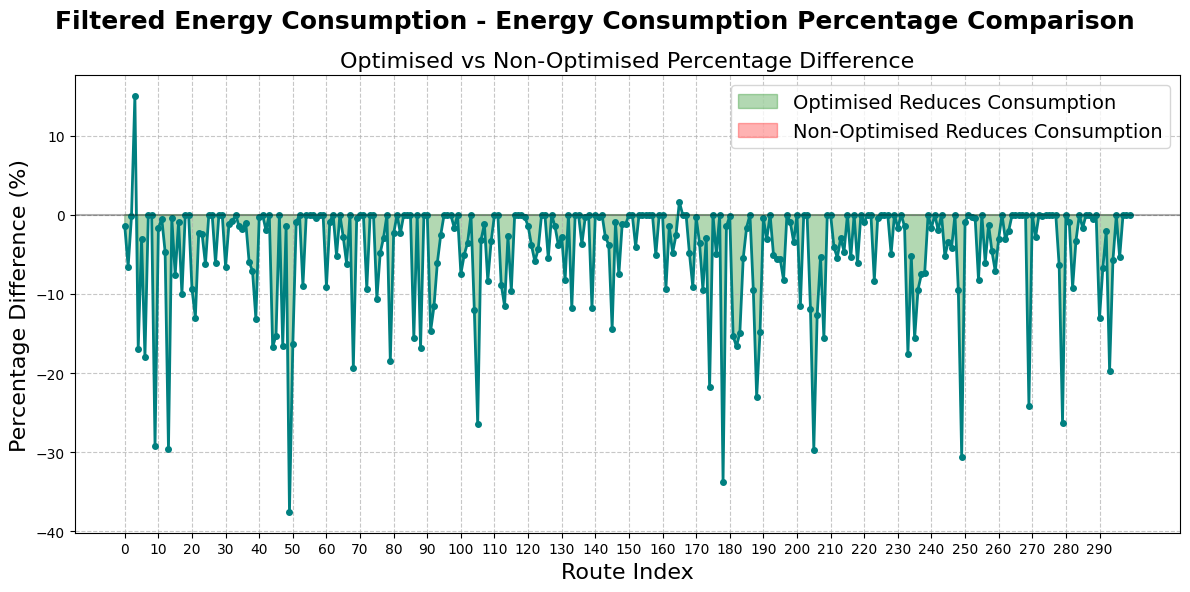

Original data points: 456
Filtered data points: 300
Points where optimised is better: 291 (63.8%)
Points in filtered set where optimised is better: 291 (97.0%)
Average percentage difference: -4.92%
Median percentage difference: -1.69%
Routes improved: 97.0%


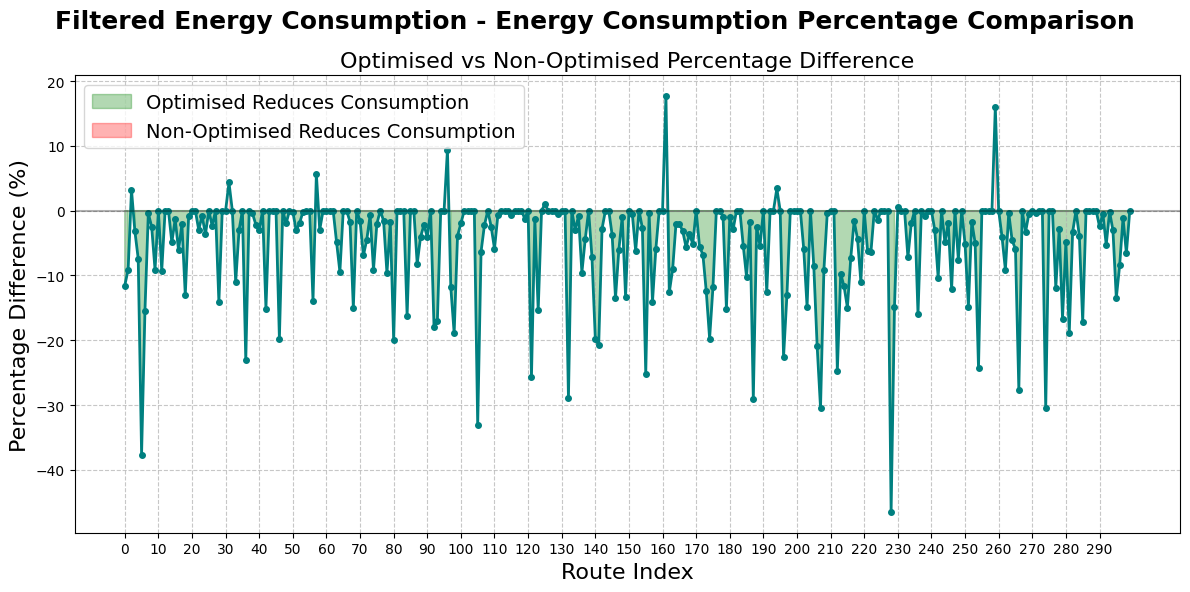

couldnt find consumption for sim500
Original data points: 468
Filtered data points: 300
Points where optimised is better: 286 (61.1%)
Points in filtered set where optimised is better: 286 (95.3%)
Average percentage difference: -3.69%
Median percentage difference: -1.65%
Routes improved: 95.3%


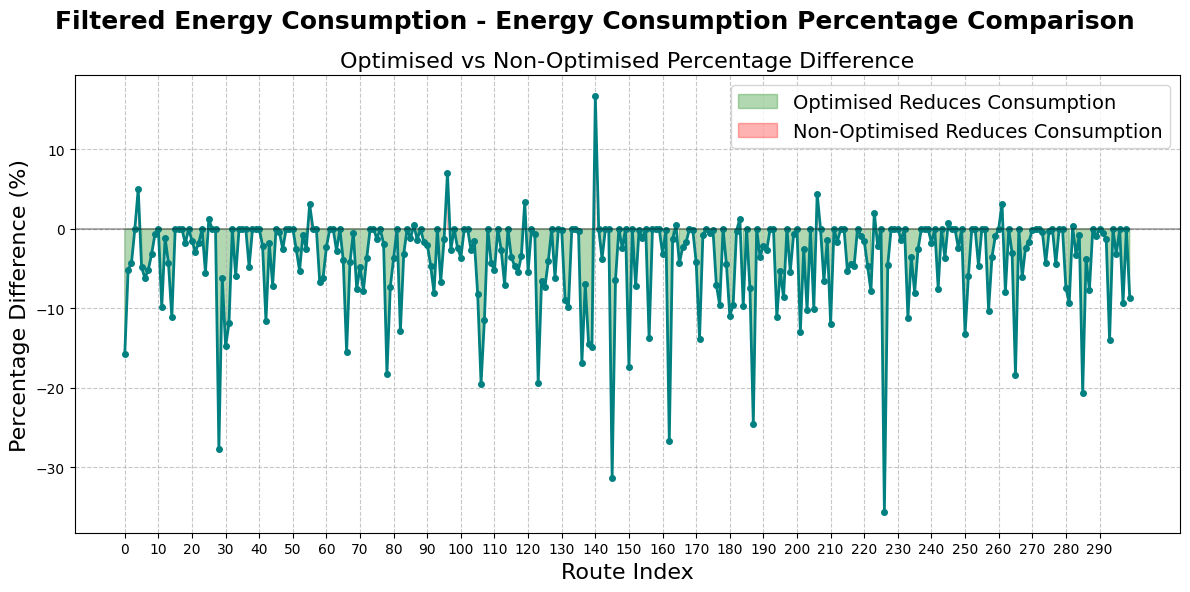

Original data points: 481
Filtered data points: 300
Points where optimised is better: 307 (63.8%)
Points in filtered set where optimised is better: 300 (100.0%)
Average percentage difference: -4.75%
Median percentage difference: -1.47%
Routes improved: 100.0%


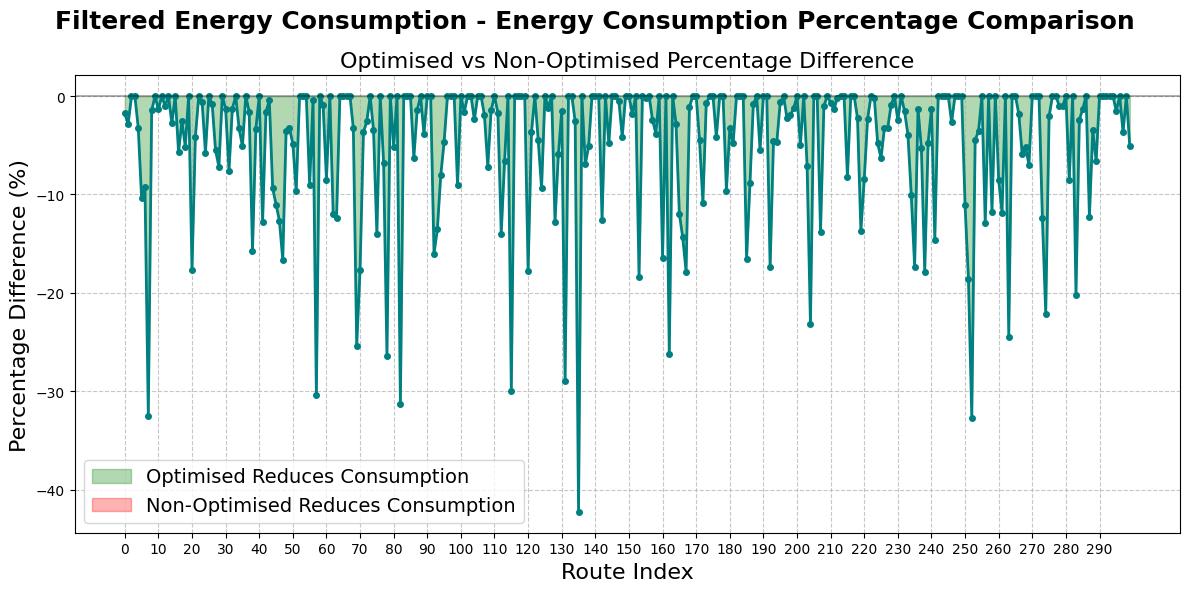

Original data points: 473
Filtered data points: 300
Points where optimised is better: 316 (66.8%)
Points in filtered set where optimised is better: 300 (100.0%)
Average percentage difference: -4.47%
Median percentage difference: -1.22%
Routes improved: 100.0%


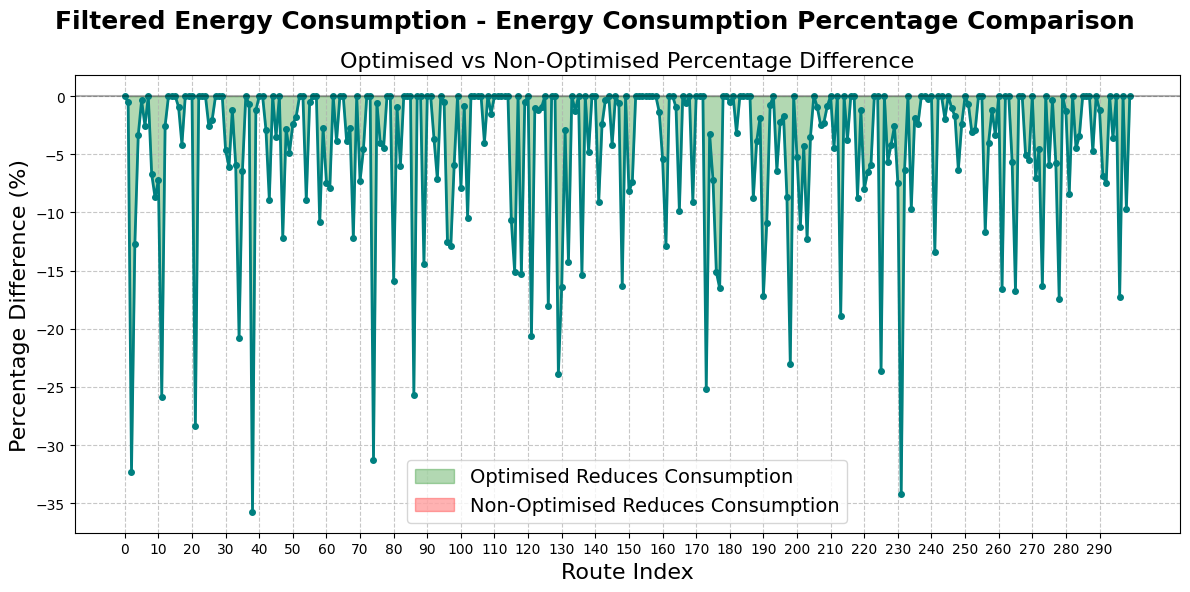

In [85]:
sim1 = "results/singular_routes_sim/simulation_test_set1.json"
sim2 = "results/singular_routes_sim/simulation_test_set2.json"
sim3 = "results/singular_routes_sim/simulation_test_set3.json"
sim4 = "results/singular_routes_sim/simulation_test_set4.json"
sim5 = "results/singular_routes_sim/simulation_test_set5.json"

sims = [sim1,sim2,sim3,sim4,sim5]

for sim in sims:
    analyse_simulation(sim)